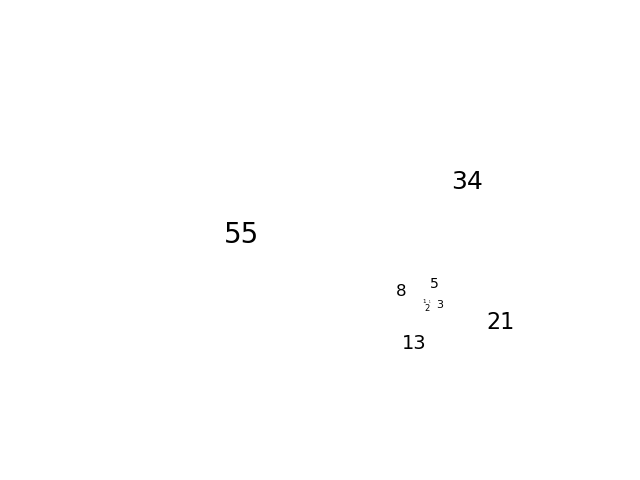

In [2]:
"""
Fibonacci squares and spirals by the use of artist, by Jacob Møller
http://matplotlib.org/examples/shapes_and_collections/artist_reference.html
"""
import matplotlib.pyplot as plt #; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

%matplotlib widget

def fib(n):
    if n < 2:
        return n
    else:
        return fib(n-1) + fib(n-2)

def label(xy, text, j):
    y = xy[1] - 0.025 # shift y-value to center label
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=j)

fig, ax = plt.subplots(); patches = []

xy = np.array([0, 0]); c = xy; i=1; t = np.array([270, 0])
for j in range(1,7+4):
    t += 90;
    if i == 5: i=1;
    if i==1:
        xy = xy + [ -fib(j-2)    , fib(j-1) ];     c = c + [ -fib(j-2), 0         ];
    if i==2:
        xy = xy + [ -fib(j)      , -fib(j-2)];     c = c + [0         , -fib(j-2) ]; 
    elif i==3:
        xy = xy + [ 0            , -fib(j)  ];     c = c + [ fib(j-2) , 0         ];
    elif i==4:
        xy = xy + [ fib(j-1)     , 0        ];     c = c + [ 0        , fib(j-2)  ];
        
    # Add a wedge
    rect = mpatches.Wedge([c[0],c[1]], fib(j), t[0] , t[1]   , ec="k")
    patches.append(rect)
    
    # Add a rectangle
    rect = mpatches.Rectangle([xy[0],xy[1]], fib(j), fib(j), ec="k"); patches.append(rect); i+=1;
    label( xy+[0.5*fib(j),  0.5*fib(j)], "%s"%fib(j), j*2)

colors = np.linspace(0, 0, 0)
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.9)
collection.set_array(np.array(colors))
ax.add_collection(collection)
plt.axis('equal')
plt.axis('off')
plt.grid('off')
plt.show();

